<a href="https://colab.research.google.com/github/vishalakshi-19/ML_Week1/blob/main/Copy_of_knn_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier


X = [
    [1, 9], [2, 8], [2, 7], [3, 7], [3, 6],
    [4, 6], [5, 6], [6, 7], [7, 6], [8, 5],
    [9, 6], [10, 5], [8, 7], [9, 8], [10, 7]
]


y = [
    "Fail", "Fail", "Fail", "Fail", "Fail",
    "Pass", "Pass", "Pass", "Pass", "Pass",
    "Pass", "Pass", "Pass", "Pass", "Pass"
]


knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)


test_points = [[2, 8], [5, 5], [9, 7]]
predictions = knn.predict(test_points)




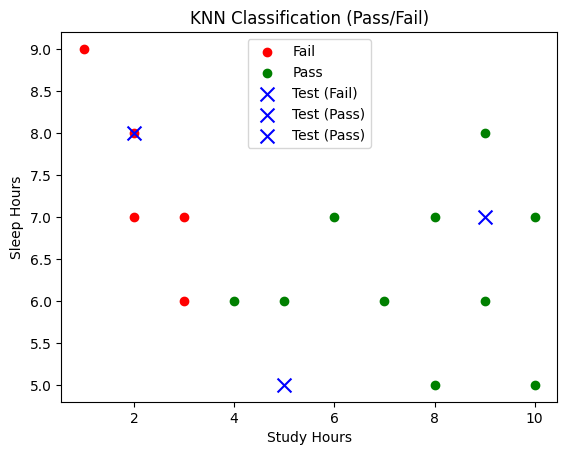

In [2]:


X_fail = [X[i] for i in range(len(X)) if y[i] == "Fail"]
X_pass = [X[i] for i in range(len(X)) if y[i] == "Pass"]


plt.scatter([p[0] for p in X_fail], [p[1] for p in X_fail], color="red", label="Fail")
plt.scatter([p[0] for p in X_pass], [p[1] for p in X_pass], color="green", label="Pass")


for point, pred in zip(test_points, predictions):
    plt.scatter(point[0], point[1], color="blue", marker="x", s=100, label=f"Test ({pred})")

plt.xlabel("Study Hours")
plt.ylabel("Sleep Hours")
plt.title("KNN Classification (Pass/Fail)")
plt.legend()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt


The new fruit is predicted as: Orange


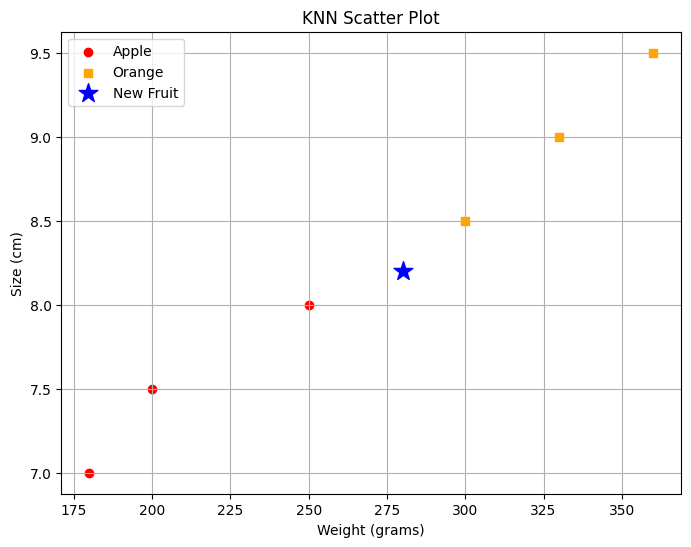

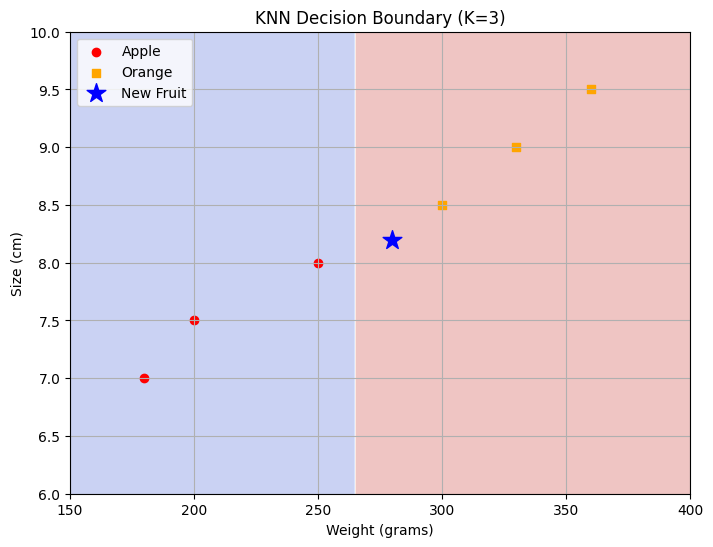

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# --- Training data ---
X = np.array([(180, 7), (200, 7.5), (250, 8), (300, 8.5), (330, 9), (360, 9.5)])
y_labels = ["Apple", "Apple", "Apple", "Orange", "Orange", "Orange"]

# Convert labels to numeric
y = np.array([0 if label == "Apple" else 1 for label in y_labels])

# New fruit to classify
new_point = np.array([[280, 8.2]])

# --- Train KNN ---
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)
prediction = knn.predict(new_point)

# Map numeric prediction back to label
pred_label = "Apple" if prediction[0] == 0 else "Orange"
print(f"The new fruit is predicted as: {pred_label}")

# --- Scatter Plot ---
plt.figure(figsize=(8, 6))
for (weight, size), label in zip(X, y_labels):
    if label == "Apple":
        plt.scatter(weight, size, color="red", marker="o", label="Apple" if "Apple" not in plt.gca().get_legend_handles_labels()[1] else "")
    else:
        plt.scatter(weight, size, color="orange", marker="s", label="Orange" if "Orange" not in plt.gca().get_legend_handles_labels()[1] else "")

plt.scatter(new_point[0,0], new_point[0,1], color="blue", marker="*", s=200, label="New Fruit")
plt.xlabel("Weight (grams)")
plt.ylabel("Size (cm)")
plt.title("KNN Scatter Plot")
plt.legend()
plt.grid(True)
plt.show()

# --- Decision Boundary ---
x_min, x_max = 150, 400
y_min, y_max = 6, 10
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
for (weight, size), label in zip(X, y_labels):
    if label == "Apple":
        plt.scatter(weight, size, color="red", marker="o", label="Apple" if "Apple" not in plt.gca().get_legend_handles_labels()[1] else "")
    else:
        plt.scatter(weight, size, color="orange", marker="s", label="Orange" if "Orange" not in plt.gca().get_legend_handles_labels()[1] else "")

plt.scatter(new_point[0,0], new_point[0,1], color="blue", marker="*", s=200, label="New Fruit")
plt.xlabel("Weight (grams)")
plt.ylabel("Size (cm)")
plt.title("KNN Decision Boundary (K=3)")
plt.legend()
plt.grid(True)
plt.show()